In [12]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import math

In [13]:
# load data
data_frame = pd.read_csv('house_prices.csv')
feature_vectors = ['house age', 'distance to the nearest MRT station', 'number of convenience stores',
                   'house price of unit area']
data_frame

,No,house age,distance to the nearest MRT station,number of convenience stores,house price of unit area
0,1,6.6,90.45606,9,58.1
1,2,20.5,2185.12800,3,25.6
2,3,30.0,1013.34100,5,22.8
3,4,12.9,250.63100,7,39.3
4,5,29.4,4510.35900,1,13.2
...,...,...,...,...,...
395,396,40.9,167.59890,5,41.0
396,397,31.7,5512.03800,1,18.8
397,398,8.0,132.54690,9,47.3
398,399,11.9,3171.32900,0,46.6


In [14]:
feature_vectors

['house age',
 'distance to the nearest MRT station',
 'number of convenience stores',
 'house price of unit area']

after loading all data we need, go on the first step: pre-processing data

step 1: pre-processing data

In [15]:
# step 1: pre-processing data
# 3 features
data_house_age = data_frame[feature_vectors[0]]
data_distance_to_station = data_frame[feature_vectors[1]]
data_nb_of_stores = data_frame[feature_vectors[2]]

# 1 output
data_house_price = data_frame[feature_vectors[-1]]

# get normalized data
max_house_age = max(list(data_house_age))
min_house_age = min(list(data_house_age))
new_house_age = [((x - min_house_age) / (max_house_age - min_house_age))
                 for x in list(data_house_age)]

max_distance_to_station = max(list(data_distance_to_station))
min_distance_to_station = min(list(data_distance_to_station))
new_distance_to_station = [((x - min_distance_to_station) / (max_distance_to_station - min_distance_to_station))
                           for x in list(data_distance_to_station)]

max_nb_of_stores = max(list(data_nb_of_stores))
min_nb_of_stores = min(list(data_nb_of_stores))
new_nb_of_stores = [((x - min_nb_of_stores) / (max_nb_of_stores - min_nb_of_stores))
                    for x in list(data_nb_of_stores)]

step 2: Creating test and training set

In [16]:
# step 2: Creating test and training set
# total data y
data_house_price_y = np.array(data_house_price).reshape(-1, 1)
# total data x for three features
data_house_age_x = np.array(new_house_age).reshape(-1, 1)
data_distance_to_station_x = np.array(new_distance_to_station).reshape(-1, 1)
data_nb_of_stores_x = np.array(new_nb_of_stores).reshape(-1, 1)
# split data to training data and test data
# shuffle == false <==> not random
train_data_house_age_x, test_data_house_age_x, train_data_house_price_y, test_data_house_price_y = \
    train_test_split(data_house_age_x, data_house_price_y, test_size=0.25, shuffle=False)



In order to compare with different features seperately, we create a function handling with step 3--step 5:

fuction:

Stochastic_gradient_decent

this function return: 

1.theta[] after training

2.RMSE value we calculated

step 3 & 4 & 5: Stochastic gradient descent & Visualization & Evaluation

In [17]:
# step 3 & 4 & 5: Stochastic gradient descent & Visualization & Evaluation
def Stochastic_gradient_decent(train_data_feature_x, test_data_feature_x,
                               train_data_output_y, test_data_output_y):
    # step 3: Stochastic gradient descent
    loss_record = []  # record loss function value
    iter_record = []  # record iteration value
    training_len = len(train_data_feature_x)
    testing_len = len(test_data_feature_x)
    max_iteration = 50
    alpha = 0.01  # learning rate
    theta = [-1, -0.5]  # 𝜃 coefficients
    iter_count = 0

    # for every iteration
    while iter_count < max_iteration:
        loss = 0
        # algorithmn body
        for i in range(training_len):
            predicted_fuc = theta[0] * 1 + theta[1] * train_data_feature_x[i][0]
            theta[0] = theta[0] + alpha * (train_data_output_y[i][0] - predicted_fuc) * 1
            theta[1] = theta[1] + alpha * (train_data_output_y[i][0] - predicted_fuc) * train_data_feature_x[i][0]
        # calculate J(theta) cost fuction
        for j in range(training_len):
            predicted_fuc = theta[0] * 1 + theta[1] * train_data_feature_x[j][0]
            error = (train_data_output_y[j][0] - predicted_fuc) ** 2
            loss = loss + error
        loss = (1 / training_len) * loss
        iter_count += 1
        loss_record.append(loss)
        iter_record.append(iter_count)

    # step 4: Visualization
    iter_x = np.array(iter_record).reshape(-1, 1)
    loss_y = np.array(loss_record).reshape(-1, 1)
    # model = linear_model.LinearRegression()
    # model.fit(iter_x, loss_y)
    # predicted_y = model.predict(iter_x)
    plt.scatter(iter_x, loss_y, color="red")
    plt.show()

    # step 5: Evaluation
    # compute RMSE for training set
    total_sum_training_set = 0
    for i in range(training_len):
        predicted_fuc = theta[0] * 1 + theta[1] * train_data_feature_x[i][0]
        temp_sum = (train_data_output_y[i][0] - predicted_fuc) ** 2
        total_sum_training_set += temp_sum
    RMSE_training = math.sqrt(total_sum_training_set / training_len)

    # compute RMSE for training set
    total_sum_testing_set = 0
    for i in range(testing_len):
        predicted_fuc = theta[0] * 1 + theta[1] * test_data_feature_x[i][0]
        temp_sum = (test_data_output_y[i][0] - predicted_fuc) ** 2
        total_sum_testing_set += temp_sum
    RMSE_testing = math.sqrt(total_sum_testing_set / testing_len)

    return theta, RMSE_training, RMSE_testing

for the first feature: house_age

we get the theta[0] and theta[1],
and also, RMSE for both training data set and testing data set;

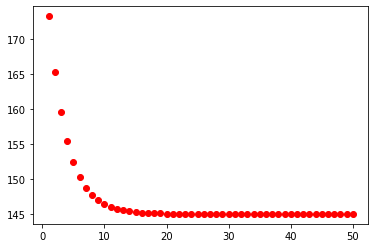

RMSE for house age training data set is :  12.045510305912353
RMSE for house age testing data set is :  16.58731450340051
theta for house age is :  theta[0] :  42.54078538346594 theta[1] :  -10.319399022339129



In [18]:
 # step 3 & 4 & 5: Stochastic gradient descent & Visualization & Evaluation
feature = feature_vectors[0]
theta_house_age_model, RMSE_training_house_age, RMSE_testing_house_age = \
    Stochastic_gradient_decent(train_data_house_age_x, test_data_house_age_x,
                               train_data_house_price_y, test_data_house_price_y)
print("RMSE for", feature, "training data set is : ", RMSE_training_house_age)
print("RMSE for", feature, "testing data set is : ", RMSE_testing_house_age)
print("theta for", feature, "is : ", "theta[0] : ", theta_house_age_model[0], "theta[1] : ",
      theta_house_age_model[1])
print()


Then, we compute the other two features:

which are 'distance to the nearest MRT station' and 'number of convenience stores';

and compute corresponding theta[] and RMSE value;


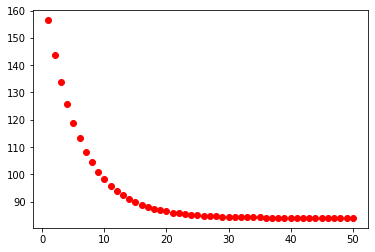

RMSE for distance to the nearest MRT station training data set is :  9.165754538401488
RMSE for distance to the nearest MRT station testing data set is :  12.652088009723935
theta for distance to the nearest MRT station is :  theta[0] :  44.766087037899375 theta[1] :  -46.500633970906314



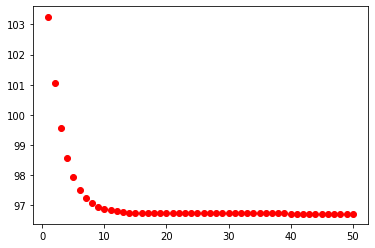

RMSE for number of convenience stores training data set is :  9.83487827563954
RMSE for number of convenience stores testing data set is :  14.731993508206784
theta for number of convenience stores is :  theta[0] :  27.486676129636784 theta[1] :  25.642117651334722



In [19]:
# step 6: Repeating for the other two features
# for feature distance
feature = feature_vectors[1]
train_data_distance_x, test_data_distance_x, train_data_house_price_y, test_data_house_price_y = \
    train_test_split(data_distance_to_station_x, data_house_price_y, test_size=0.25, shuffle=False)
theta_distance_model, RMSE_training_distance, RMSE_testing_distance = \
    Stochastic_gradient_decent(train_data_distance_x, test_data_distance_x,
                               train_data_house_price_y, test_data_house_price_y)
print("RMSE for", feature, "training data set is : ", RMSE_training_distance)
print("RMSE for", feature, "testing data set is : ", RMSE_testing_distance)
print("theta for", feature, "is : ", "theta[0] : ", theta_distance_model[0], "theta[1] : ",
      theta_distance_model[1])
print()

 # for feature number of stores
feature = feature_vectors[2]
train_data_nb_store_x, test_data_nb_store_x, train_data_house_price_y, test_data_house_price_y = \
    train_test_split(data_nb_of_stores_x, data_house_price_y, test_size=0.25, shuffle=False)
theta_nb_store_model, RMSE_training_nb_store, RMSE_testing_nb_store = \
    Stochastic_gradient_decent(train_data_nb_store_x, test_data_nb_store_x,
                               train_data_house_price_y, test_data_house_price_y)
print("RMSE for", feature, "training data set is : ", RMSE_training_nb_store)
print("RMSE for", feature, "testing data set is : ", RMSE_testing_nb_store)
print("theta for", feature, "is : ", "theta[0] : ", theta_nb_store_model[0], "theta[1] : ",
      theta_nb_store_model[1])
print()

In [17]:
# step 7: bonus compare
RMSE_training_dict = {feature_vectors[0]: RMSE_training_house_age,
                     feature_vectors[1]: RMSE_training_distance,
                     feature_vectors[2]: RMSE_training_nb_store, }
RMSE_testing_dict = {feature_vectors[0]: RMSE_testing_house_age,
                     feature_vectors[1]: RMSE_testing_distance,
                     feature_vectors[2]: RMSE_testing_nb_store, }
result_train = sorted(RMSE_training_dict.items(), key=lambda item: item[1])
result_test = sorted(RMSE_testing_dict.items(), key=lambda item: item[1])
print(result_train)
print(result_test)

[('distance to the nearest MRT station', 9.165754538401488), ('number of convenience stores', 9.165754538401488), ('house age', 12.045510305912353)]
[('distance to the nearest MRT station', 12.652088009723935), ('number of convenience stores', 12.652088009723935), ('house age', 16.58731450340051)]


As we can see, this time we get all this three RMSE for our data sets;

this respectively is:

RMSE for house age training data set is :  25.230370617579414

RMSE for house age testing data set is :  29.062757171534063

RMSE for distance to the nearest MRT station training data set is :  26.437983293073824

RMSE for distance to the nearest MRT station testing data set is :  30.0561440633274

RMSE for number of convenience stores training data set is :  25.87887184864255

RMSE for number of convenience stores testing data set is :  29.536341013282314

and clearly:

25.230 < 25.878 < 26.437

29.062 < 29.536 < 30.056

after this time training, we can rank all three models according to RMSE:

the performance of model_1 > model_3 > model_2;

As we use Stochastic gradient descent algorithmn for this report, the results are random. the data above is generated by some training process.

So finally, we give code for comparation as following: